# news recommendation

In [1]:
import pandas as pd

df = pd.read_parquet('data05.parquet')
df["keywords"] = df["keywords"].map(lambda dic: {key: dic[key] for key in dic.keys() if dic[key] is not None and dic[key]["filter"] > 0.1})

In [2]:
df = df.iloc[0, :]
df

aliases                      [Banco Comercial Português, BCP]
news        [{'ExtractedText': 'DN   13 de Setembro de 200...
keywords    {'Angola': {'count': 135, 'date': {'200409': N...
Name: Banco Comercial Português, dtype: object

In [3]:
#df["news"][0]["newsNER"]

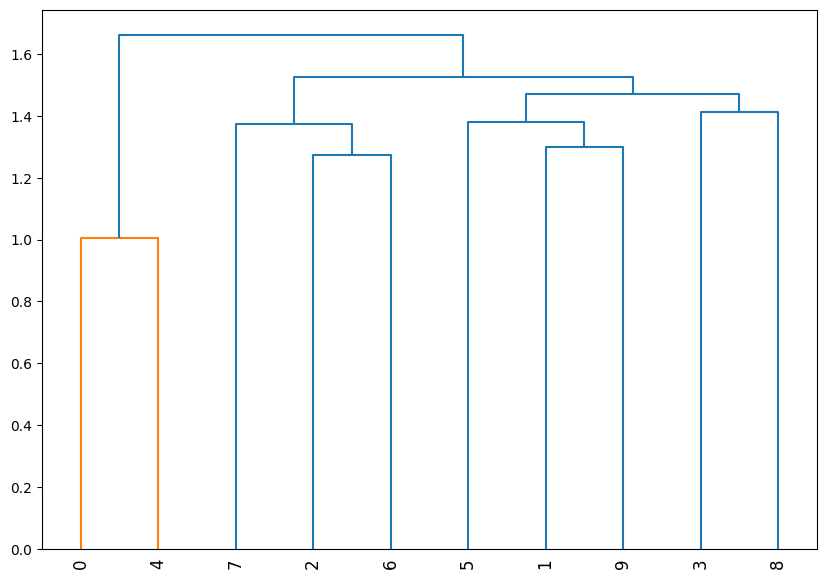

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample articles
articles = [
    "Tecnologia avança rapidamente na inteligência artificial",
    "Esporte: time ganha campeonato nacional",
    "Ciência faz descoberta sobre o universo",
    "Política: eleições e debates atuais",
    "Inteligência artificial e avanços em tecnologia",
    "Campeonato de futebol termina em vitória",
    "Descoberta científica em biotecnologia",
    "Notícias sobre economia global",
    "Viagem espacial e novas fronteiras",
    "Esporte e saúde mental dos atletas"
]

# Step 1: Compute TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(articles)
#print(tfidf_matrix)

# Step 2: Perform hierarchical clustering using 'linkage'
linked = linkage(tfidf_matrix.toarray(), method='ward')
#print(linked)

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=range(0, len(articles)), leaf_rotation=90, leaf_font_size=12)
plt.show()


In [5]:
tfidf_matrix

<10x39 sparse matrix of type '<class 'numpy.float64'>'
	with 48 stored elements in Compressed Sparse Row format>

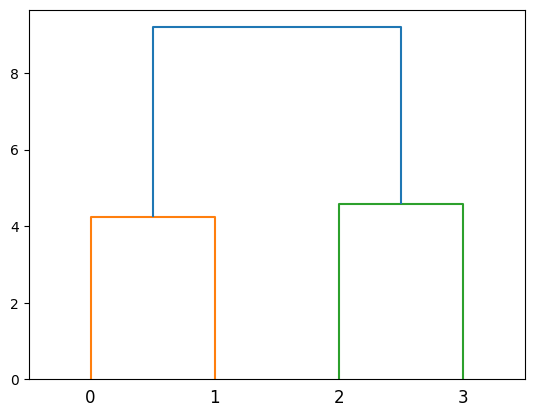

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Example user-item interaction matrix (rows are users, columns are items)
X = [[5, 3, 0, 0, 2],
     [4, 0, 0, 2, 4],
     [0, 0, 4, 4, 0],
     [1, 2, 4, 0, 0]]

# Perform hierarchical clustering (Ward's method minimizes variance within clusters)
Z = linkage(X, method='ward')

# Plot the dendrogram to visualize the clustering
dendrogram(Z)
plt.show()


In [8]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Example user-item interaction matrix (rows = users, columns = items)
X = np.array([[5, 3, 0, 0, 2],
              [4, 0, 0, 2, 4],
              [0, 0, 4, 4, 0],
              [1, 2, 4, 0, 0]])

# Perform hierarchical clustering (Ward's method)
Z = linkage(X, method='ward')

# Assign users to clusters (e.g., with 2 clusters)
n_clusters = 2
clusters = fcluster(Z, n_clusters, criterion='maxclust')

# Assuming user 0 is the user you want to make recommendations for
user_id = 0
user_cluster = clusters[user_id]

print(f"User {user_id} is initially assigned to cluster {user_cluster}.")


User 0 is initially assigned to cluster 1.


In [9]:
# Get users in the same cluster as the target user
same_cluster_users = np.where(clusters == user_cluster)[0]

# Get the item interaction data for these users
items_in_cluster = X[same_cluster_users, :]

# Recommend the items with the highest interactions/ratings in this cluster
recommended_items = np.argsort(np.sum(items_in_cluster, axis=0))[::-1]

print(f"Iteration 1 recommendations for user {user_id}: {recommended_items}")


Iteration 1 recommendations for user 0: [0 4 1 3 2]


In [10]:
# Assume the user feedback is provided in some form (e.g., likes/dislikes)
feedback = {'liked': [0, 1], 'disliked': [2, 3]}  # Example feedback: liked items 0, 1 and disliked 2, 3

# In the next iteration, focus on refining the recommendations by:
# a. Reassessing the user's position within the cluster (more granular sub-clusters).
# b. Shifting to a nearby cluster if the initial cluster was not a good match.

# E.g., If feedback suggests items from a particular cluster are disliked, refine by exploring other clusters.

# In this case, let's just assume we're exploring a nearby cluster in iteration 2
new_cluster = user_cluster + 1 if user_cluster < n_clusters else user_cluster - 1  # Change cluster as an example

# Get users from the new cluster
same_cluster_users = np.where(clusters == new_cluster)[0]

# Get the item interaction data for the new cluster
items_in_new_cluster = X[same_cluster_users, :]

# Recommend the items with the highest interactions/ratings in this new cluster
recommended_items_new = np.argsort(np.sum(items_in_new_cluster, axis=0))[::-1]

print(f"Iteration 2 recommendations for user {user_id}: {recommended_items_new}")


Iteration 2 recommendations for user 0: [2 3 1 0 4]


---
---
---

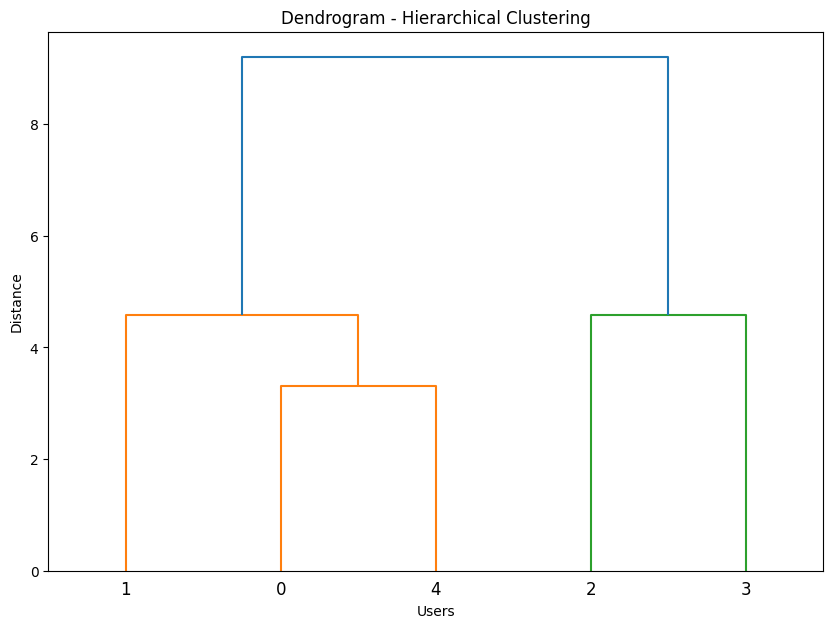

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Example user-item interaction matrix (randomized for demo purposes)
# 5 users, 5 items (ratings or interaction count)
X = np.array([[5, 3, 0, 0, 2],
              [4, 0, 0, 2, 4],
              [0, 0, 4, 4, 0],
              [1, 2, 4, 0, 0],
              [2, 3, 1, 0, 3]])

# Perform hierarchical clustering (Ward's method)
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Users")
plt.ylabel("Distance")
plt.show()


---
----
---
---

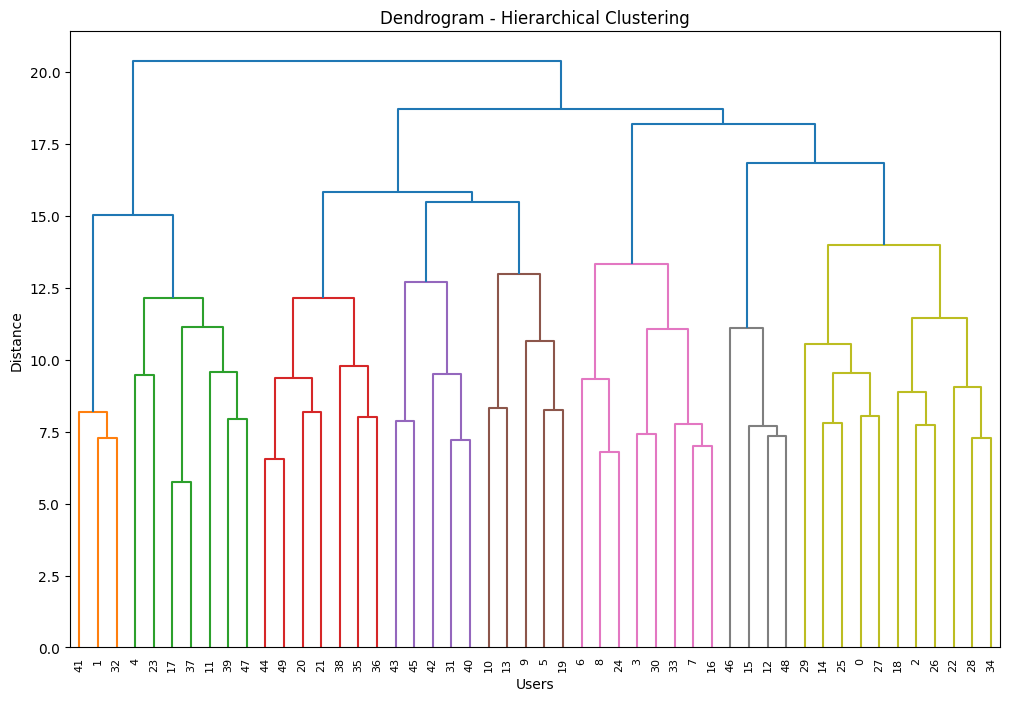


User 0 is initially assigned to cluster 1.


--- Iteration 1 ---
Recommended Items (based on current cluster):
Item 1 (Rating: 2.52)
Item 9 (Rating: 2.36)
Item 8 (Rating: 2.64)

Please rate the following items on a scale of 0 to 5:

User feedback suggests satisfaction. Refining recommendations within the current cluster...

Refined Recommendations for the next iteration:
Item 1 (Rating: 2.52)
Item 9 (Rating: 2.36)
Item 8 (Rating: 2.64)

--- Iteration 2 ---
Recommended Items (based on current cluster):
Item 20 (Rating: 2.8)
Item 19 (Rating: 2.2)
Item 2 (Rating: 2.18)

Please rate the following items on a scale of 0 to 5:

User feedback suggests dissatisfaction. Trying to move to a neighboring cluster...
Exploring nearby cluster 1...

Refined Recommendations for the next iteration:
Item 16 (Rating: 2.52)
Item 20 (Rating: 2.8)
Item 6 (Rating: 2.52)

--- Iteration 3 ---
Recommended Items (based on current cluster):
Item 20 (Rating: 2.8)
Item 19 (Rating: 2.2)
Item 2 (Rating: 2.18)

Please 

ValueError: invalid literal for int() with base 10: ''

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import random

# Create a larger user-item interaction matrix (e.g., 50 users, 20 items)
np.random.seed(42)
num_users = 50
num_items = 20

# Simulate random user-item interaction (ratings between 0-5)
X = np.random.randint(0, 6, size=(num_users, num_items))

# Perform hierarchical clustering (Ward's method)
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Users")
plt.ylabel("Distance")
plt.show()

# Perform initial clustering (let's pick 5 clusters for this demo)
from scipy.cluster.hierarchy import fcluster
n_clusters = 5
clusters = fcluster(Z, n_clusters, criterion='maxclust')

# Randomly assign user to a cluster (starting point)
user_id = 0  # We will assume the user is the first user
user_cluster = random.choice(clusters)  # Assign the user to a random cluster

# Show initial cluster assignment
print(f"\nUser {user_id} is initially assigned to cluster {user_cluster}.\n")

# Function to recommend items based on cluster (randomized)
def recommend_items_for_cluster(cluster, X):
    cluster_users = np.where(clusters == cluster)[0]  # Get users in the same cluster
    items_in_cluster = X[cluster_users, :]  # Get item interaction data for these users
    item_scores = np.sum(items_in_cluster, axis=0)  # Summing up the ratings of the items
    recommended_items = np.argsort(item_scores)[::-1]  # Get the items with highest total ratings
    return recommended_items[:3]  # Recommend top 3 items

# Function to collect user feedback
def get_user_feedback():
    feedback = []
    print("\nPlease rate the following items on a scale of 0 to 5:")
    for i in range(3):  # Rating 3 items
        rating = int(input(f"Item {i+1}: "))
        feedback.append(rating)
    return feedback

# Function to refine recommendations based on feedback
def refine_recommendations(feedback, user_cluster, X, clusters):
    # If feedback is mostly negative, move to a neighboring cluster
    if np.mean(feedback) < 3:
        print("\nUser feedback suggests dissatisfaction. Trying to move to a neighboring cluster...")
        # Move to a neighboring cluster (just an example for now)
        nearby_cluster = user_cluster + 1 if user_cluster < n_clusters else user_cluster - 1
        print(f"Exploring nearby cluster {nearby_cluster}...")
        return recommend_items_for_cluster(nearby_cluster, X)
    else:
        # If feedback is positive, reinforce the current cluster or its sub-clusters
        print("\nUser feedback suggests satisfaction. Refining recommendations within the current cluster...")
        return recommend_items_for_cluster(user_cluster, X)

# Simulate multiple iterations with a larger search space (e.g., 5 iterations)
def run_recommendation_iterations(iterations=5):
    # Starting cluster assignment (random)
    user_cluster = random.choice(clusters)
    
    for iteration in range(iterations):
        print(f"\n--- Iteration {iteration + 1} ---")
        
        # Recommend items for the current cluster
        recommended_items = recommend_items_for_cluster(user_cluster, X)
        
        # Display the recommended items
        print("Recommended Items (based on current cluster):")
        for item_id in recommended_items:
            print(f"Item {item_id + 1} (Rating: {np.mean(X[:, item_id])})")
        
        # Get user feedback
        user_feedback = get_user_feedback()
        
        # Refine recommendations based on feedback
        refined_recommendations = refine_recommendations(user_feedback, user_cluster, X, clusters)
        
        # Show the refined recommendations
        print("\nRefined Recommendations for the next iteration:")
        for item_id in refined_recommendations:
            print(f"Item {item_id + 1} (Rating: {np.mean(X[:, item_id])})")
        
        # After the first round, the system will narrow down to more accurate recommendations
        user_cluster = refined_recommendations[0]  # Example of refining user cluster based on feedback

# Run the interactive recommendation system for 5 iterations
run_recommendation_iterations(iterations=5)
